# Business Questions
1) Which restaurant received the most orders?
2) Which restaurant saw most sales?
3) Which customer ordered the most?
4) When do customers order more in a day?
5) Which is the most liked cuisine?
6) Which zone has the most sales?

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
plt.rcParams['font.size'] = 15.0
plt.style.use('dark_background')

# Loading Data

In [3]:
restaurants = pd.read_excel('Restaurants.xlsx')
restaurants.head()

,RestaurantID,RestaurantName,Cuisine,Zone,Category
0,1,The Cave Hotel,Continental,Zone B,Pro
1,2,SSK Hotel,North Indian,Zone D,Pro
2,3,ASR Restaurant,South Indian,Zone D,Ordinary
3,4,Win Hotel,South Indian,Zone D,Ordinary
4,5,Denver Restaurant,Continental,Zone D,Pro


In [4]:
restaurants.shape

(20, 5)

In [5]:
orders = pd.read_excel('Orders.xlsx')
orders.head()

,Order ID,Customer Name,Restaurant ID,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,OD1,Srini,6,2022-01-01 23:15:00,5,633,Debit Card,47,5,3
1,OD2,Revandh,13,2022-01-01 19:21:00,5,258,Credit Card,41,3,5
2,OD3,David,9,2022-01-01 23:15:00,7,594,Cash on Delivery,30,3,4
3,OD4,Selva,4,2022-01-01 20:31:00,5,868,Cash on Delivery,30,3,4
4,OD5,Vinny,4,2022-01-01 11:10:00,4,170,Debit Card,18,4,3


In [6]:
orders.shape

(500, 10)

> We have 20 restaurants and 500 orders

In [7]:
# Merging the 2 datasets
restaurants_orders = restaurants.merge(orders,how='inner',left_on='RestaurantID', right_on='Restaurant ID').drop('Restaurant ID',axis=1) # to avoid duplicate columns
restaurants_orders.head()

,RestaurantID,RestaurantName,Cuisine,Zone,Category,Order ID,Customer Name,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,1,The Cave Hotel,Continental,Zone B,Pro,OD9,David,2022-01-01 13:39:00,5,248,Debit Card,27,3,4
1,1,The Cave Hotel,Continental,Zone B,Pro,OD16,Meera,2022-01-01 12:19:00,5,546,Cash on Delivery,28,5,2
2,1,The Cave Hotel,Continental,Zone B,Pro,OD22,Suhaib,2022-01-01 17:39:00,7,630,Cash on Delivery,37,3,3
3,1,The Cave Hotel,Continental,Zone B,Pro,OD23,Meera,2022-01-01 14:31:00,1,28,Debit Card,29,3,2
4,1,The Cave Hotel,Continental,Zone B,Pro,OD58,David,2022-01-01 11:19:00,6,953,Debit Card,24,3,3


In [8]:
print("Null Values Exist:", restaurants_orders.isna().values.any())

Null Values Exist: False


--------------------------------------------------------------

# Answering Business Questions

---

<AxesSubplot:>

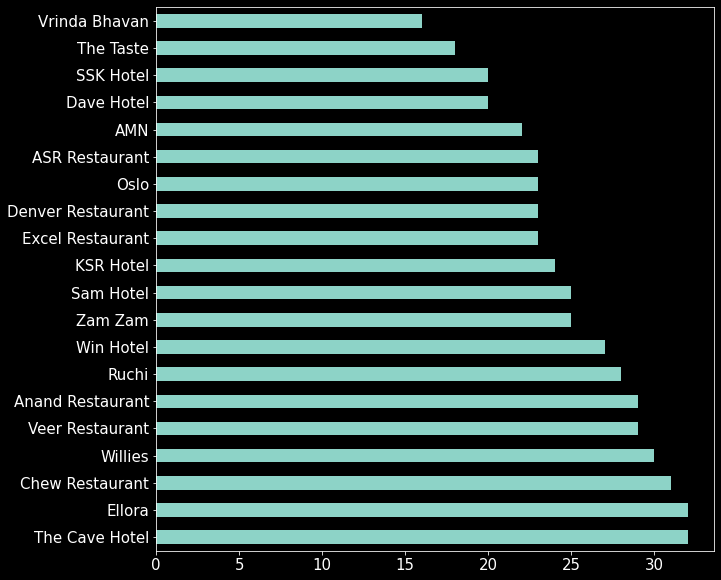

In [9]:
restaurants_orders['RestaurantName'].value_counts().plot(kind="barh",figsize=(10,10))

>1) "Ellora" & "The Cave Hotel" received the most orders

------------------------------

<AxesSubplot:ylabel='RestaurantName'>

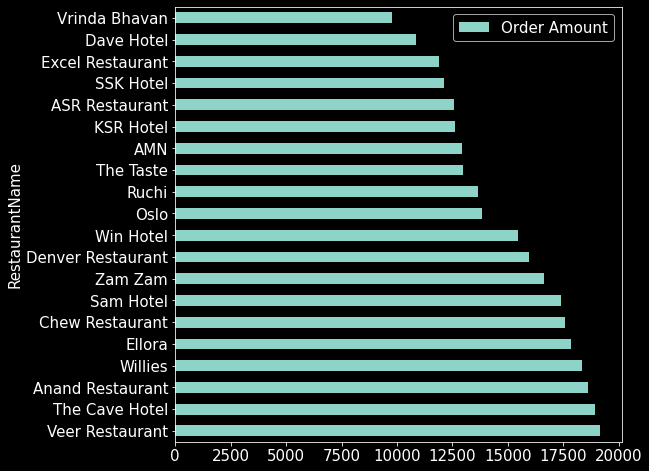

In [10]:
restaurants_sales = restaurants_orders.groupby('RestaurantName').agg({'Order Amount':'sum'}).sort_values('Order Amount',ascending=False)
restaurants_sales.plot(kind="barh",figsize=(8,8))

>2. "Veer Restaurant" saw the most sales

-------------------------------------

Text(0.5, 1.0, 'Customers And Their Number Of Orders')

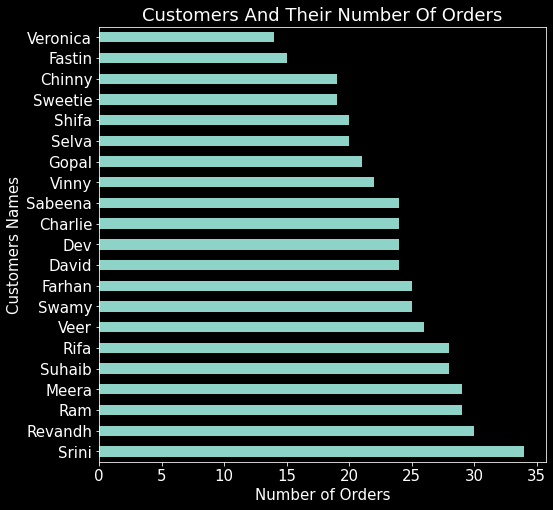

In [11]:
restaurants_orders['Customer Name'].value_counts().plot(kind='barh',figsize=(8,8))
plt.xlabel('Number of Orders')
plt.ylabel('Customers Names')
plt.title('Customers And Their Number Of Orders')

>3. The customer "Srini" ordered the most

------------------------------

In [12]:
restaurants_orders["binned_hours"] = pd.cut(restaurants_orders['Order Date'].dt.hour, bins=3)
restaurants_orders["binned_hours"].unique()

[(10.988, 15.0], (15.0, 19.0], (19.0, 23.0]]
Categories (3, interval[float64, right]): [(10.988, 15.0] < (15.0, 19.0] < (19.0, 23.0]]

In [13]:
restaurants_orders['binned_hours'].value_counts()

(10.988, 15.0]    290
(19.0, 23.0]      141
(15.0, 19.0]       69
Name: binned_hours, dtype: int64

Text(0.5, 1.0, 'Number of Orders In Different Periods Of Time')

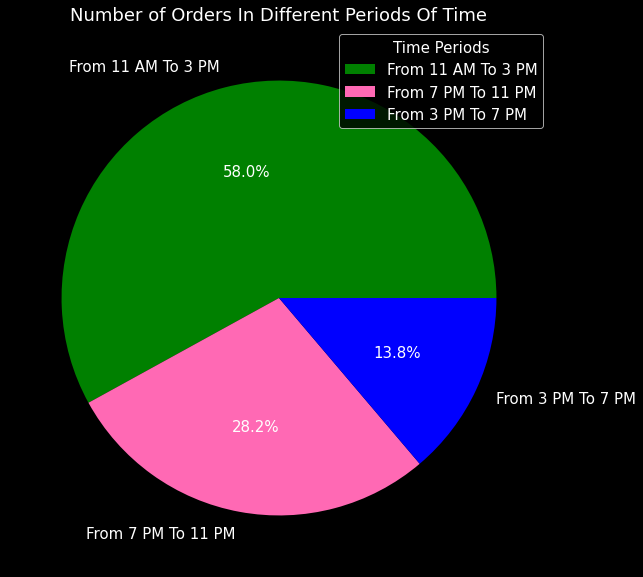

In [14]:
plt.figure(figsize=(10,10))
mylabels = ["From 11 AM To 3 PM", "From 7 PM To 11 PM", "From 3 PM To 7 PM"]
mycolors = ["g", "hotpink", "b"]
plt.pie(restaurants_orders['binned_hours'].value_counts(),labels=mylabels,colors=mycolors,autopct='%1.1f%%');
plt.legend(title='Time Periods')
plt.title('Number of Orders In Different Periods Of Time')

> 4. Customers order more in the time period between 11 AM and 3 PM

-------------

In [15]:
cuisine_rating = restaurants_orders.groupby('Cuisine').agg({'Customer Rating-Food':'mean'}).sort_values('Customer Rating-Food',ascending=False)
cuisine_rating

,Customer Rating-Food
Cuisine,
North Indian,3.592593
African,3.459016
Arabian,3.440000
Continental,3.381818
Chinese,3.308642
French,3.267606
Belgian,3.250000
South Indian,3.214286


>5. The North Indian Cuisine is the most liked cuisine according to the mean of customer rating to the food

-------

<AxesSubplot:xlabel='Zone'>

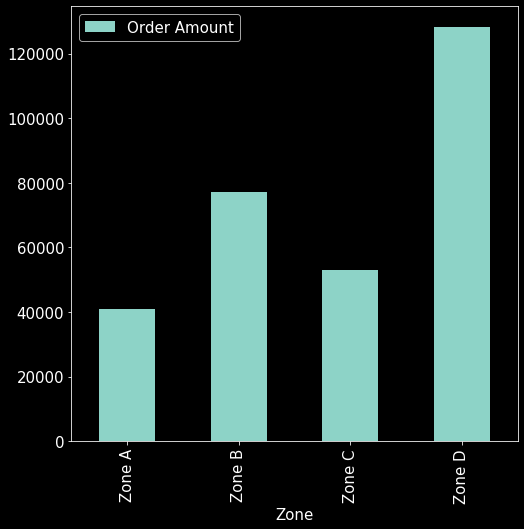

In [16]:
restaurants_orders.groupby('Zone').agg({'Order Amount':'sum'}).plot(kind="bar",figsize=(8,8))

>6. Zone D has the most sales

---

# Additional Information (was not asked on kaggle)

--------

In [17]:
table=pd.crosstab(restaurants_orders['binned_hours'],restaurants_orders['Payment Mode'])
table

Payment Mode,Cash on Delivery,Credit Card,Debit Card
binned_hours,,,
"(10.988, 15.0]",99,90,101
"(15.0, 19.0]",23,24,22
"(19.0, 23.0]",47,43,51


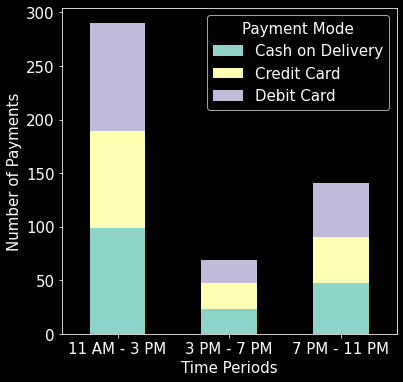

In [18]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.xlabel('Time Periods')
plt.ylabel('Number of Payments')
plt.xticks(np.arange(3), ['11 AM - 3 PM', '3 PM - 7 PM', '7 PM - 11 PM'],rotation='horizontal') 
plt.show()

> As we can see, there is no difference between the number of payments done by each payment mode in each of the 3 time periods.

---

In [19]:
table=pd.crosstab(restaurants_orders['binned_hours'],restaurants_orders['Cuisine'])
table

Cuisine,African,Arabian,Belgian,Chinese,Continental,French,North Indian,South Indian
binned_hours,,,,,,,,
"(10.988, 15.0]",34,19,26,49,32,40,45,45
"(15.0, 19.0]",12,2,11,9,6,7,14,8
"(19.0, 23.0]",15,4,19,23,17,24,22,17


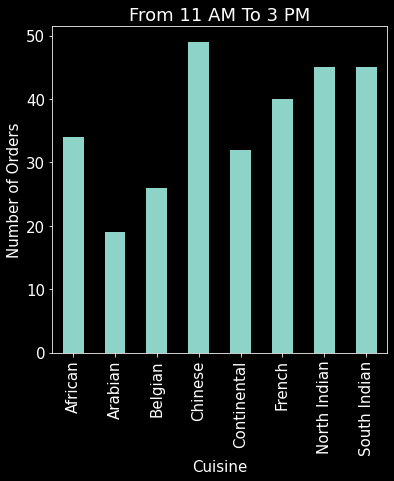

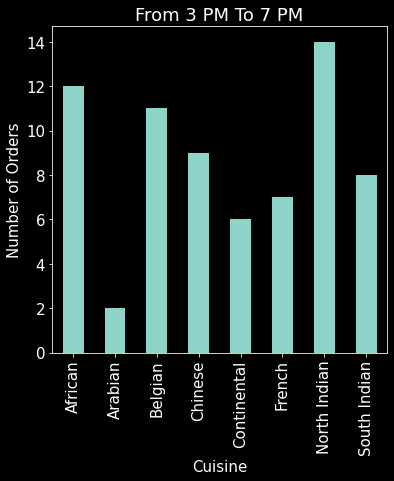

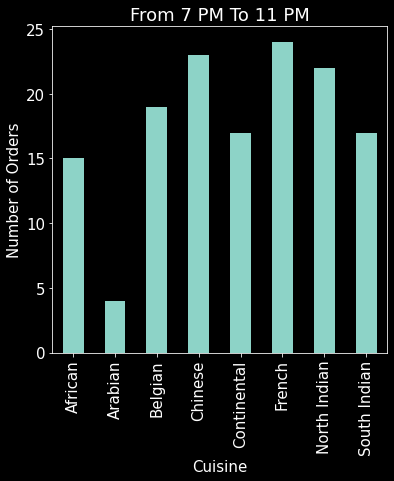

In [20]:
table.iloc[0].plot(kind='bar',figsize=(6,6))
plt.title('From 11 AM To 3 PM')
plt.xlabel('Cuisine')
plt.ylabel('Number of Orders')
plt.show()

table.iloc[1].plot(kind='bar',figsize=(6,6))
plt.title('From 3 PM To 7 PM')
plt.xlabel('Cuisine')
plt.ylabel('Number of Orders')
plt.show()

table.iloc[2].plot(kind='bar',figsize=(6,6))
plt.title('From 7 PM To 11 PM')
plt.xlabel('Cuisine')
plt.ylabel('Number of Orders')
plt.show()

> From 11 AM To 3 PM --> the most ordered cuisine is the "Chinese" cuisine.

> From 3 PM To 7 PM --> the most ordered cuisine is the "North Indian" cuisine.

> From 7 PM To 11 PM --> the most ordered cuisine is the "French" cuisine.

- So, if you want to open a restaurant in that city and you want to know what type of cuisine you provide.
1)  You will check your opening hours and compare it with the above periods.
2)  Check which cuisine is the most ordered in that time period.

- For example, if your restaurant opening hours is from 1 PM to 10 PM.

  So, most of your opening hours is in the period between 3 PM and 7 PM, so the cuisine that will maximize your profit is the "North Indian" cuisine.

---

Text(0.5, 1.0, 'Restaurant Name vs Delivery Time')

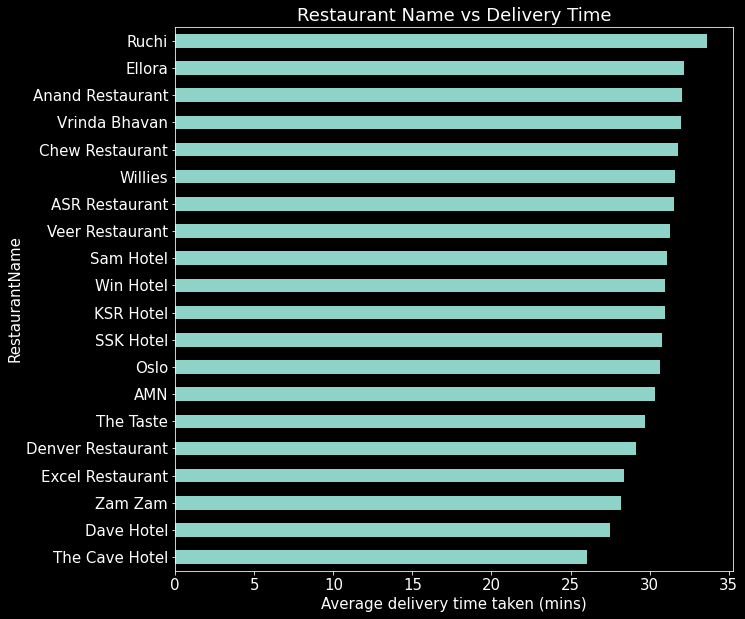

In [21]:
restaurants_orders.groupby('RestaurantName').agg({'Delivery Time Taken (mins)':'mean'}).sort_values('Delivery Time Taken (mins)').plot(kind='barh',figsize=(10,10),legend=False)
plt.xlabel('Average delivery time taken (mins)')
plt.title('Restaurant Name vs Delivery Time')

> "The Cave Hotel" restaurant has the smallest average delivery time

----

Text(0.5, 1.0, 'Restaurant Name vs Delivery Time')

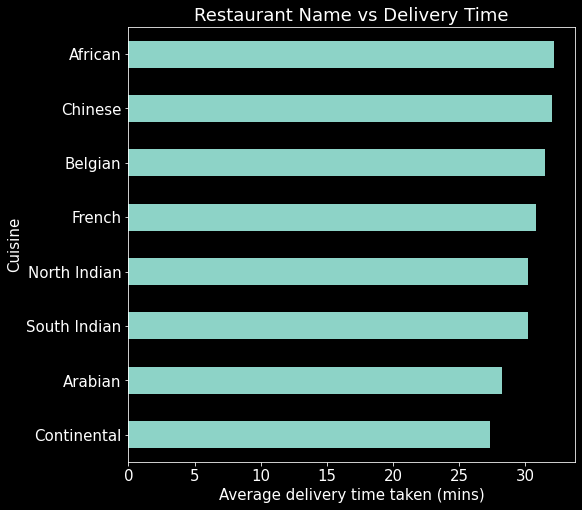

In [22]:
restaurants_orders.groupby('Cuisine').agg({'Delivery Time Taken (mins)':'mean'}).sort_values('Delivery Time Taken (mins)').plot(kind='barh',figsize=(8,8),legend=False)
plt.xlabel('Average delivery time taken (mins)')
plt.title('Restaurant Name vs Delivery Time')

> The "Continental" cuisine is somehow delivered in a less time than other cuisines.

---

Text(0.5, 0, 'Total Quantity of Items')

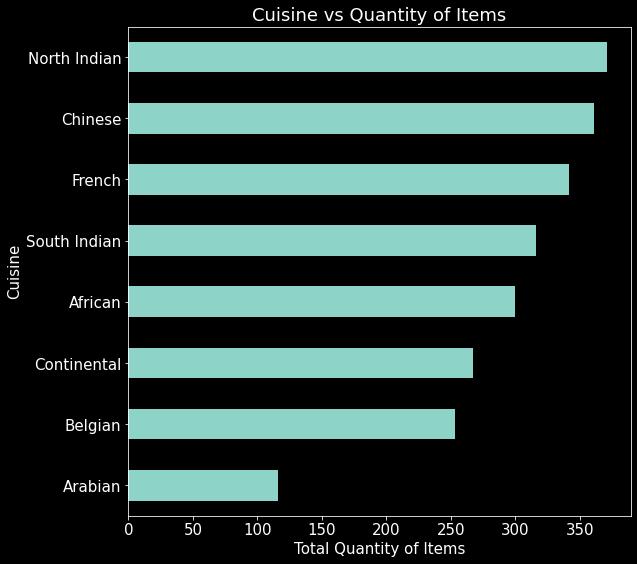

In [23]:
restaurants_orders.groupby('Cuisine').agg({'Quantity of Items':'sum'}).sort_values('Quantity of Items').plot(kind='barh',legend=False,figsize=(9,9))
plt.title('Cuisine vs Quantity of Items')
plt.xlabel('Total Quantity of Items')

> The "North Indian" cuisine has the most quantity of items sold.

---

In [24]:
table=pd.crosstab(restaurants_orders['Zone'],restaurants_orders['Cuisine'])
table

Cuisine,African,Arabian,Belgian,Chinese,Continental,French,North Indian,South Indian
Zone,,,,,,,,
Zone A,0,0,25,24,0,0,0,20
Zone B,0,0,31,28,32,41,0,0
Zone C,61,25,0,0,0,0,0,0
Zone D,0,0,0,29,23,30,81,50


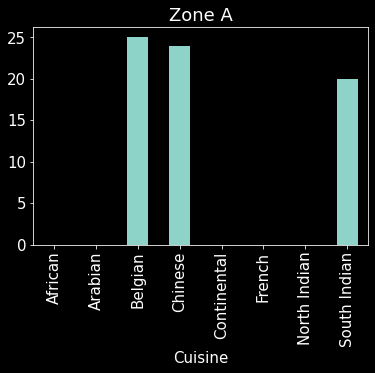

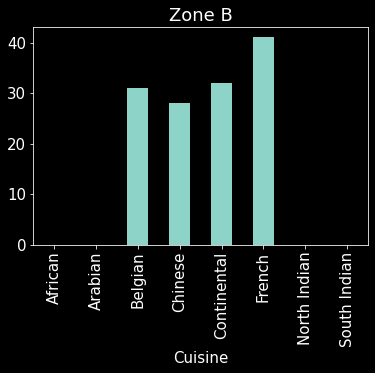

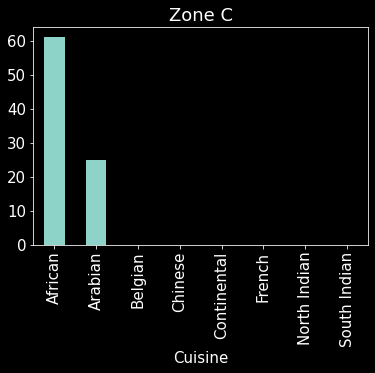

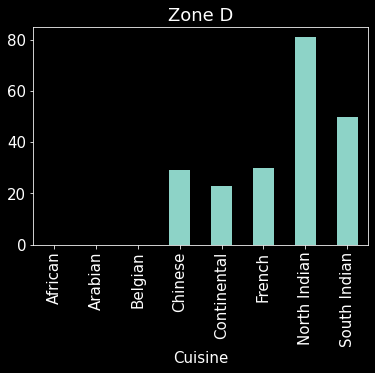

In [25]:
table.iloc[0].plot(kind='bar')
plt.title('Zone A')
plt.show()

table.iloc[1].plot(kind='bar')
plt.title('Zone B')
plt.show()

table.iloc[2].plot(kind='bar')
plt.title('Zone C')
plt.show()

table.iloc[3].plot(kind='bar')
plt.title('Zone D')
plt.show()

- People in Zone A seems to like the "Belgian" and "Chinese" cuisine.

- People in Zone B seems to like the "French" cuisine.

- People in Zone C seems to like the "African" cuisine.

- People in Zone D seems to like the "North Indian" cuisine.


----

## <h2 align="center"> Thank You! <h2/>

# <h2 align="center"> Author <h2/>

<h2 align="center"> <a href="https://www.linkedin.com/in/marwan-mostafa-2863b0210/"> Marwan Mostafa </a> <h2/>
